In [40]:
#Load mnist dataset

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255


In [41]:
#confirm label shape
print("train_labels shape:", train_labels.shape)
print("train_labels example:", train_labels[:10])


train_labels shape: (60000,)
train_labels example: [5 0 4 1 9 2 1 3 1 4]


In [42]:
#Model definition

from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(784,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


/home/sajad/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5


I0000 00:00:1753367927.097052   17590 service.cc:148] XLA service 0x7e52a80037a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753367927.097512   17590 service.cc:156]   StreamExecutor device (0): Quadro T2000 with Max-Q Design, Compute Capability 7.5
2025-07-24 16:38:47.252988: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1753367927.457938   17590 cuda_dnn.cc:529] Loaded cuDNN version 90101


 20/469 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5544 - loss: 1.4337 

I0000 00:00:1753367929.043780   17590 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8707 - loss: 0.4460
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9671 - loss: 0.1129
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9797 - loss: 0.0706
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9847 - loss: 0.0499
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9896 - loss: 0.0356


In [44]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9768 - loss: 0.0787
Test accuracy: 0.9801999926567078


In [45]:
predictions = network.predict(test_images)

import numpy as np
print("Predicted label:", np.argmax(predictions[0]))
print("True label:", test_labels[0])



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Predicted label: 7
True label: 7


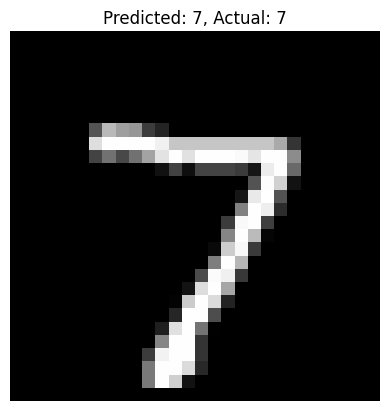

In [47]:
import matplotlib.pyplot as plt

plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}, Actual: {test_labels[0]}")
plt.axis('off')
plt.show()
